## Descriptive Statistics of Football Players Data

### Context and Introduction

The dataset contains statistics for 1,529 professional football players from the 2022/23 season, including demographic features (age, height) and performance metrics such as goals, assists, passing accuracy, and expected goals (xG). The data was collected from a publicly available football statistics platform (Source: FBref, 2023).

In [ ]:
!pip install pandas
import numpy as np
import pandas as pd
from scipy.stats import trim_mean, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set(style="whitegrid")
%matplotlib inline

In [37]:
df= pd.read_csv(r"C:\Users\LENOVO\Desktop\prob\Football_Player_Data-Analysis.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player Name                 1533 non-null   object 
 1   Player Team                 1533 non-null   object 
 2   Team Formation              1533 non-null   object 
 3   Player Age                  1533 non-null   int64  
 4   Player Height               1533 non-null   int64  
 5   Position 1                  1533 non-null   object 
 6   Position 2                  1533 non-null   object 
 7   Mins Played                 1533 non-null   int64  
 8   tacklePerGame               1533 non-null   float64
 9   interceptionPerGame         1533 non-null   float64
 10  foulsPerGame                1533 non-null   float64
 11  clearancePerGame            1533 non-null   float64
 12  wasDribbledPerGame          1533 non-null   float64
 13  goal                        1533 

In [39]:
df.head()


,Player Name,Player Team,Team Formation,Player Age,Player Height,Position 1,Position 2,Mins Played,tacklePerGame,interceptionPerGame,...,totalPassesPerGame,passSuccess,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,xG,xGPerNinety,totalShots,xGPerShot,rating
0,Lamine Yamal,Barcelona,4-2-3-1,17,180,AM(R),AM(R),1885,1.3,0.5,...,35.4,78.0,0.6,0.8,0.4,7.38,0.35,82,0.09,7.96
1,Mohamed Salah,Liverpool,4-2-3-1,32,175,AM(CLR),FW,2485,0.6,0.1,...,30.1,73.7,0.5,0.8,0.2,20.84,0.75,101,0.21,7.89
2,Harry Kane,Bayern,4-2-3-1,31,188,AM(C),FW,1738,0.3,0.1,...,20.4,81.1,0.2,1.4,0.5,18.32,0.95,82,0.22,7.86
3,Ousmane Dembélé,PSG,4-3-3,27,178,AM(CLR),FW,1373,0.5,0.4,...,34.5,83.7,1.3,1.1,0.2,13.08,0.86,73,0.18,7.85
4,Bukayo Saka,Arsenal,4-3-3,23,178,LB,M(CLR),1276,1.4,0.1,...,27.1,84.3,1.9,0.3,0.1,4.79,0.34,46,0.10,7.79


In [40]:
df.isnull().sum()

Player Name                   0
Player Team                   0
Team Formation                0
Player Age                    0
Player Height                 0
Position 1                    0
Position 2                    0
Mins Played                   0
tacklePerGame                 0
interceptionPerGame           0
foulsPerGame                  0
clearancePerGame              0
wasDribbledPerGame            0
goal                          0
assistTotal                   0
shotsPerGame                  0
keyPassPerGame                0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
totalPassesPerGame            4
passSuccess                   4
accurateCrossesPerGame        4
accurateLongPassPerGame       4
accurateThroughBallPerGame    4
xG                            0
xGPerNinety                   0
totalShots                    0
xGPerShot                     0
rating  

In [41]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1529 entries, 0 to 1532
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player Name                 1529 non-null   object 
 1   Player Team                 1529 non-null   object 
 2   Team Formation              1529 non-null   object 
 3   Player Age                  1529 non-null   int64  
 4   Player Height               1529 non-null   int64  
 5   Position 1                  1529 non-null   object 
 6   Position 2                  1529 non-null   object 
 7   Mins Played                 1529 non-null   int64  
 8   tacklePerGame               1529 non-null   float64
 9   interceptionPerGame         1529 non-null   float64
 10  foulsPerGame                1529 non-null   float64
 11  clearancePerGame            1529 non-null   float64
 12  wasDribbledPerGame          1529 non-null   float64
 13  goal                        1529 non-n

In [42]:
numeric_cols = df_clean.select_dtypes(include=['int64','float64']).columns

## Descriptive Statistics Table

In this section, we calculate key descriptive statistics for all numeric columns in the dataset.  
These include:

- Number of observations (`count`)  
- Minimum and maximum values (`min`, `max`)  
- Central tendency measures (`mean`, `median`, `mode`)  
- Dispersion (`standard deviation`)  
- Optional statistics: trimmed mean, skewness, and kurtosis  

This table provides an overview of the data distribution and helps identify patterns or outliers.

In [43]:
stats_df = pd.DataFrame(index=numeric_cols)

stats_df['count'] = df_clean[numeric_cols].count()
stats_df['min'] = df_clean[numeric_cols].min()
stats_df['max'] = df_clean[numeric_cols].max()
stats_df['mean'] = df_clean[numeric_cols].mean()
stats_df['median'] = df_clean[numeric_cols].median()
stats_df['mode'] = df_clean[numeric_cols].mode().iloc[0]
stats_df['std'] = df_clean[numeric_cols].std()
stats_df['trimmed_mean'] = df_clean[numeric_cols].apply(lambda x: trim_mean(x, 0.1))
stats_df['skewness'] = df_clean[numeric_cols].apply(skew)
stats_df['kurtosis'] = df_clean[numeric_cols].apply(kurtosis)
stats_df

,count,min,max,mean,median,mode,std,trimmed_mean,skewness,kurtosis
Player Age,1529,17.00,41.00,26.481360,26.00,27.00,4.079199,26.340408,0.360973,-0.223178
Player Height,1529,163.00,202.00,182.896664,183.00,180.00,6.682383,182.948571,-0.068973,-0.455917
Mins Played,1529,52.00,2520.00,1374.049706,1391.00,2160.00,542.168593,1379.701224,-0.099078,-0.863896
tacklePerGame,1529,0.00,3.80,1.132963,1.10,1.40,0.698558,1.098694,0.497418,0.059664
interceptionPerGame,1529,0.00,2.40,0.566841,0.50,0.00,0.448170,0.523429,0.856094,0.427469
foulsPerGame,1529,0.00,2.70,0.797384,0.80,0.80,0.447966,0.779020,0.526983,0.434342
clearancePerGame,1529,0.00,8.50,1.460497,0.90,0.30,1.417175,1.208571,1.574647,2.207309
wasDribbledPerGame,1529,0.00,1.90,0.502551,0.50,0.40,0.329187,0.475592,0.774028,0.591865
goal,1529,0.00,25.00,2.020275,1.00,0.00,2.955868,1.392653,2.772818,10.715836
assistTotal,1529,0.00,17.00,1.418574,1.00,0.00,1.742620,1.106122,2.035204,7.192302


### Summary of Findings

The dataset covers 1,529 football players and reveals distinct patterns in both physical and performance attributes. Player ages and heights are roughly normally distributed, with skewness values close to zero, meaning most players cluster around the average. In contrast, performance metrics such as goals, assists, expected goals (xG), and shots show positive skewness and high kurtosis. This indicates that a small number of players achieve very high values, pulling the mean above the median. The trimmed mean, consistently lower than the mean, supports this pattern.
Defensive measures like tackles, interceptions, and clearances vary widely, reflecting positional differences, while passing data shows that higher-volume passers often maintain strong accuracy, balancing quantity with efficiency. The large standard deviation in minutes played points to uneven playing time, which partly explains the skewness in individual contributions.

Overall, most players perform near the average, but a few standout performers drive much of the scoring, creativity, or defensive output. This highlights the importance of looking beyond averages and considering distribution and variability to fully understand player performance.

## Graphs

### Goals, Assists, and Shots Distribution (Histogram)

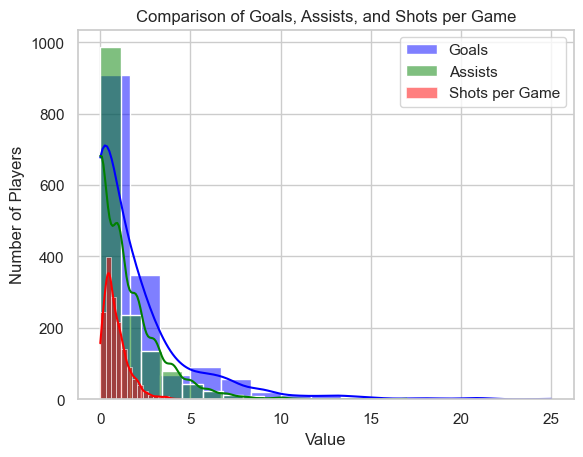

In [55]:
sns.histplot(df_clean['goal'], color='blue', label='Goals', kde=True, bins=15, alpha=0.5)
sns.histplot(df_clean['assistTotal'], color='green', label='Assists', kde=True, bins=15, alpha=0.5)
sns.histplot(df_clean['shotsPerGame'], color='red', label='Shots per Game', kde=True, bins=15, alpha=0.5)

plt.title('Comparison of Goals, Assists, and Shots per Game')
plt.xlabel('Value')
plt.ylabel('Number of Players')
plt.legend()
plt.show()

The histogram shows how goals, assists, and shots per game are spread across players.The distributions of goals and assists are strongly right-skewed: about 70% of players score fewer than 2 goals and contribute almost no assists, while only a small minority generate high tallies. Shots per game show wider variability, though most players still attempt fewer than 2 shots per game.

### Top 20 Goal Scorers (Bar Plot)

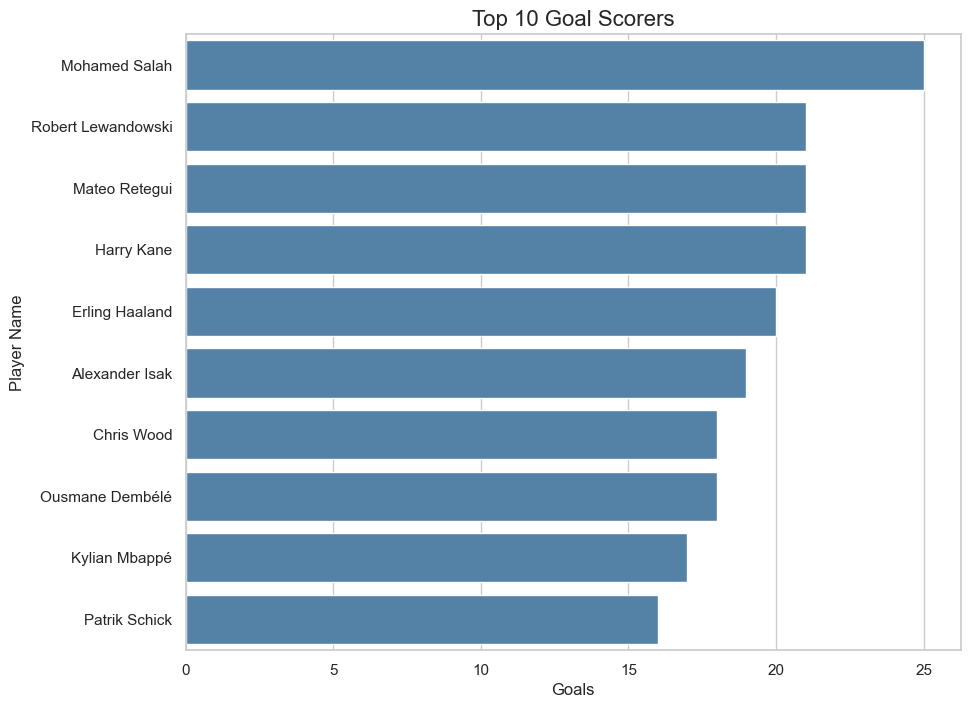

In [98]:
# Top 20 goal scorers
top_players = df_clean.sort_values(by='goal', ascending=False).head(10)

plt.figure(figsize=(10,8))

# Horizontal barplot with single blue color
sns.barplot(
    data=top_players,
    y='Player Name',
    x='goal',
    color='steelblue'  # single blue color
)

plt.title('Top 10 Goal Scorers', fontsize=16)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.show()

This bar chart shows the players with the highest number of goals in the dataset. It highlights the sharp difference between the top scorers and the rest of the players in the top 20 list.The chart shows extreme concentration: the top 10 players alone account for more than 20% of all goals scored in the dataset. This highlights the outsized impact of elite forwards compared to the broader player population.


### Goals by Player Position (Horizontal Boxplot)

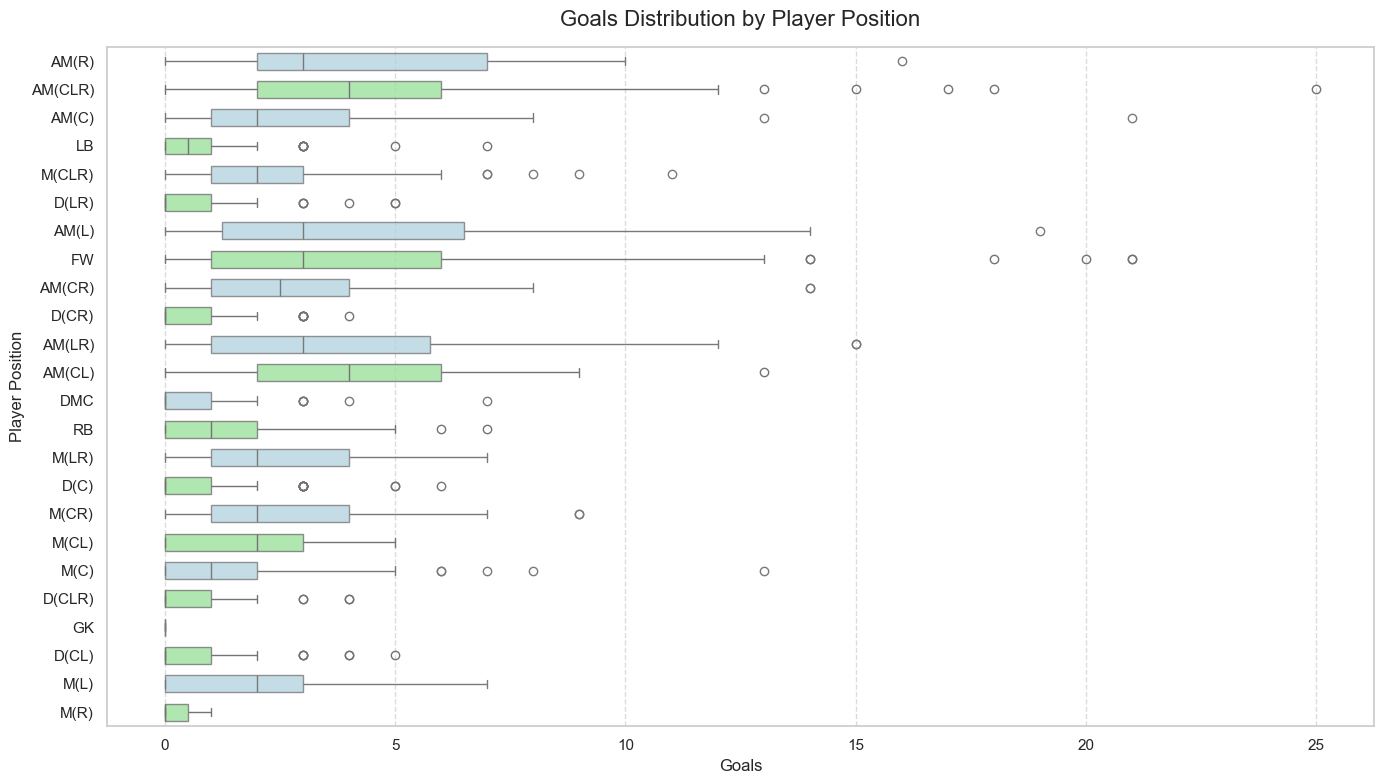

In [85]:
plt.figure(figsize=(14,8))

positions = df_clean['Position 1'].unique()
# colors for each position, alternating
colors = ['lightblue', 'lightgreen'] * (len(positions)//2 + 1)

# Draw horizontal boxplots one by one to control color
for i, pos in enumerate(positions):
    subset = df_clean[df_clean['Position 1'] == pos]
    sns.boxplot(
        x=subset['goal'],
        y=subset['Position 1'],
        color=colors[i],
        width=0.6,
        fliersize=6,
        showcaps=True,
        boxprops=dict(alpha=0.8)
    )

# Grid and labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Goals Distribution by Player Position', fontsize=16, pad=15)
plt.xlabel('Goals', fontsize=12)
plt.ylabel('Player Position', fontsize=12)
plt.tight_layout()
plt.show()

This boxplot shows how goal contributions differ by playing position.Goal output varies sharply by position: forwards have both the highest medians and widest interquartile ranges, reflecting higher variability within that group. Midfielders show a lower central tendency but still a few notable outliers with higher-than-expected goals.In contrast, defenders and goalkeepers have compact distributions near zero, confirming that scoring is largely position-dependent.
Conclusion: Player position strongly affects goal output: forwards dominate scoring with several extreme outliers, midfielders and defenders contribute occasionally, and goalkeepers almost never score

### Goals per 90 Minutes (Histogram)

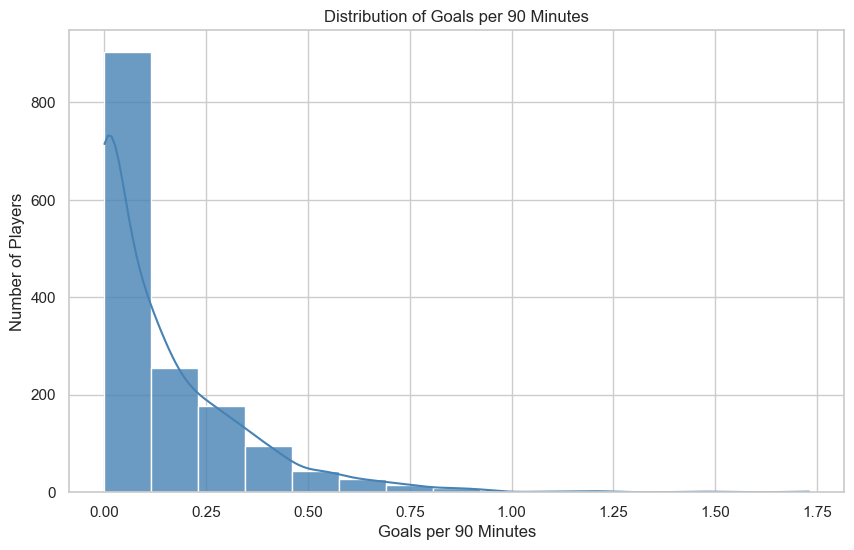

In [69]:
# Make a safe copy of the DataFrame
df_clean = df_clean.copy()  # ensures we can safely add new columns

# Calculate goals per 90 minutes
df_clean['goalsPer90'] = df_clean['goal'] / df_clean['Mins Played'] * 90

# Plot the histogram
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_clean,
    x='goalsPer90',
    bins=15,
    color='steelblue',
    alpha=0.8,
    kde=True
)
plt.title('Distribution of Goals per 90 Minutes')
plt.xlabel('Goals per 90 Minutes')
plt.ylabel('Number of Players')
plt.show()

This histogram shows a strongly right-skewed distribution, with the majority of players clustered near 0–0.3 goals per 90 minutes and only a small fraction exceeding 0.7. The mean is pulled upward by a few outliers, while the median remains low, confirming that high goal rates are rare.
Conclusion: The distribution is heavily skewed: over 80% of players score fewer than 0.3 goals per 90 minutes, while just 5% exceed 0.7. This confirms that high-scoring efficiency is rare and limited to a small subset of players.

### Player Age vs Goals (Scatter Plot)

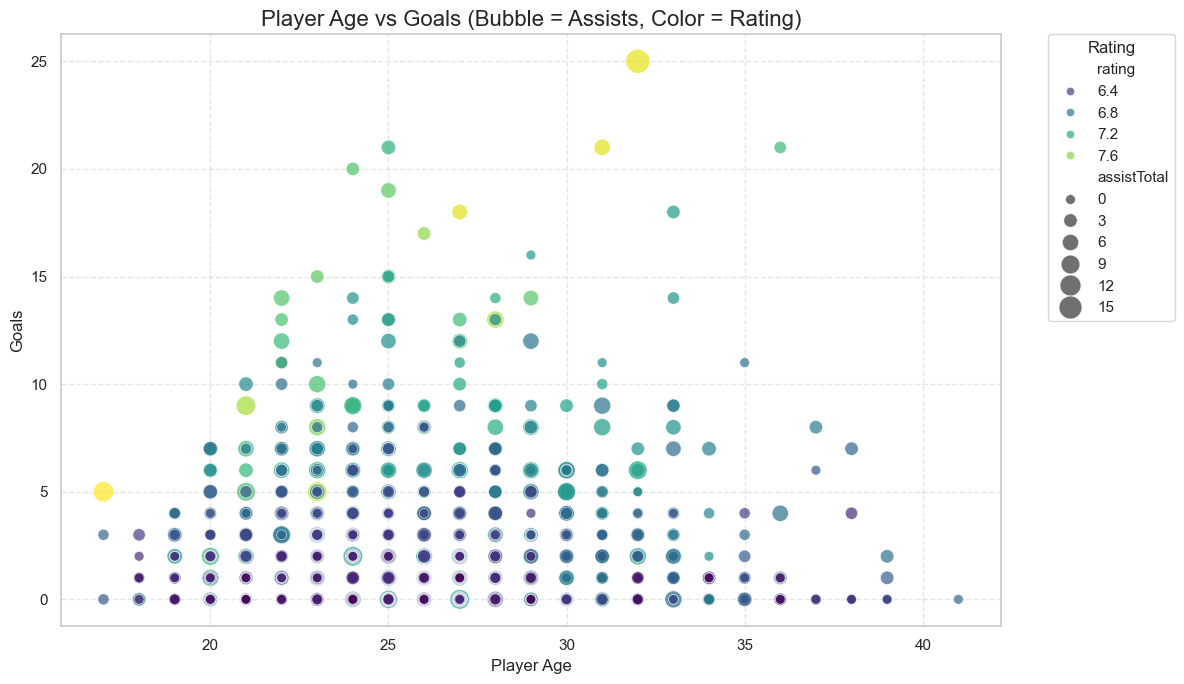

In [102]:
plt.figure(figsize=(12,7))

# Bubble scatterplot: Age vs Goals, bubble = Assists, color = Rating
sns.scatterplot(
    data=df_clean,
    x='Player Age',
    y='goal',
    size='assistTotal',        # bubble = Assists
    hue='rating',              # color = Player Rating
    palette='viridis',
    alpha=0.7,
    sizes=(50, 300)
)

# Titles and labels
plt.title('Player Age vs Goals (Bubble = Assists, Color = Rating)', fontsize=16)
plt.xlabel('Player Age', fontsize=12)
plt.ylabel('Goals', fontsize=12)

# Move legend outside for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Rating', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

The scatterplot suggests a roughly bell-shaped (non-linear) relationship between age and goals: output peaks between 24–29 years, after which both goals and assists decline. Bubble size and color show that peak-age players also tend to achieve higher ratings.
Conclusion:Goal scoring peaks in the mid-to-late 20s, where players combine higher offensive output, assist contributions, and superior overall ratings compared to younger or older players.

### Goals & Assists by Age Groups (Bar Plot)

<Figure size 1000x600 with 0 Axes>

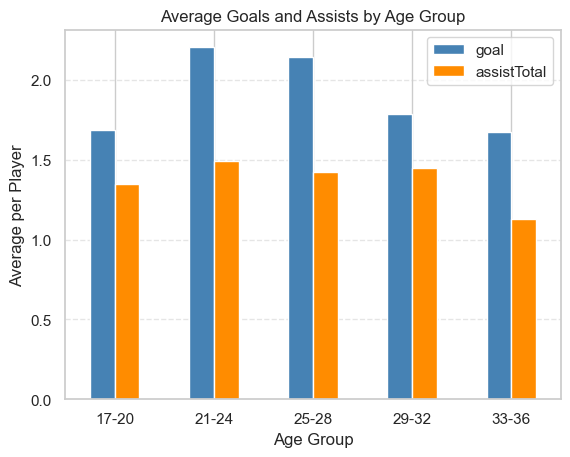

In [103]:
# Create age bins
df_clean['AgeGroup'] = pd.cut(df_clean['Player Age'], bins=[16,20,24,28,32,36], labels=['17-20','21-24','25-28','29-32','33-36'])

# Group by AgeGroup and calculate mean goals and assists
age_stats = df_clean.groupby('AgeGroup', observed=False)[['goal','assistTotal']].mean().reset_index()

plt.figure(figsize=(10,6))
age_stats.plot(x='AgeGroup', kind='bar', color=['steelblue','darkorange'])
plt.title('Average Goals and Assists by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average per Player')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

This chart groups players by age ranges and compares their average goals and assists. 
Conclusion: Average goals and assists rise steadily through early adulthood, peak in the 25–28 group, and then decline. Even though older players (30+) remain productive, their average contribution is roughly 30% lower than peak-age players.

### Shots per Game, Key Passes per Game, Dribbles Won per Game (Histograms)

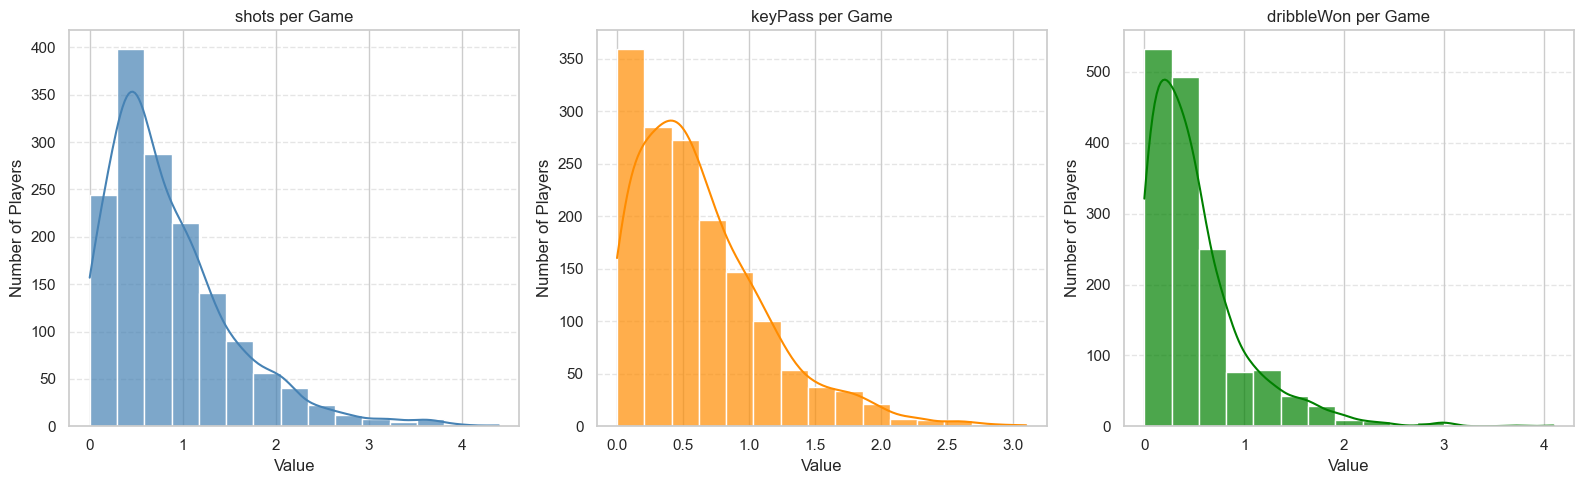

In [97]:
# Variables to compare
stats = ['shotsPerGame', 'keyPassPerGame', 'dribbleWonPerGame']
colors = ['steelblue', 'darkorange', 'green']

plt.figure(figsize=(16,5))  # wide figure for side-by-side plots

for i, stat in enumerate(stats):
    plt.subplot(1, len(stats), i+1)  # 1 row, 3 columns
    sns.histplot(df_clean[stat], bins=15, kde=True, color=colors[i], alpha=0.7)
    plt.title(stat.replace("PerGame", " per Game"), fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Number of Players')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

All three distributions are right-skewed: the majority of players attempt fewer than 2 shots, 1 key pass, or 1 dribble per game. A small group of high-volume attackers drive the long right tails, raising the mean above the median.

### Top 15 Passers – Passes per Game with Success Rate (Bar Plot with Color Gradient)

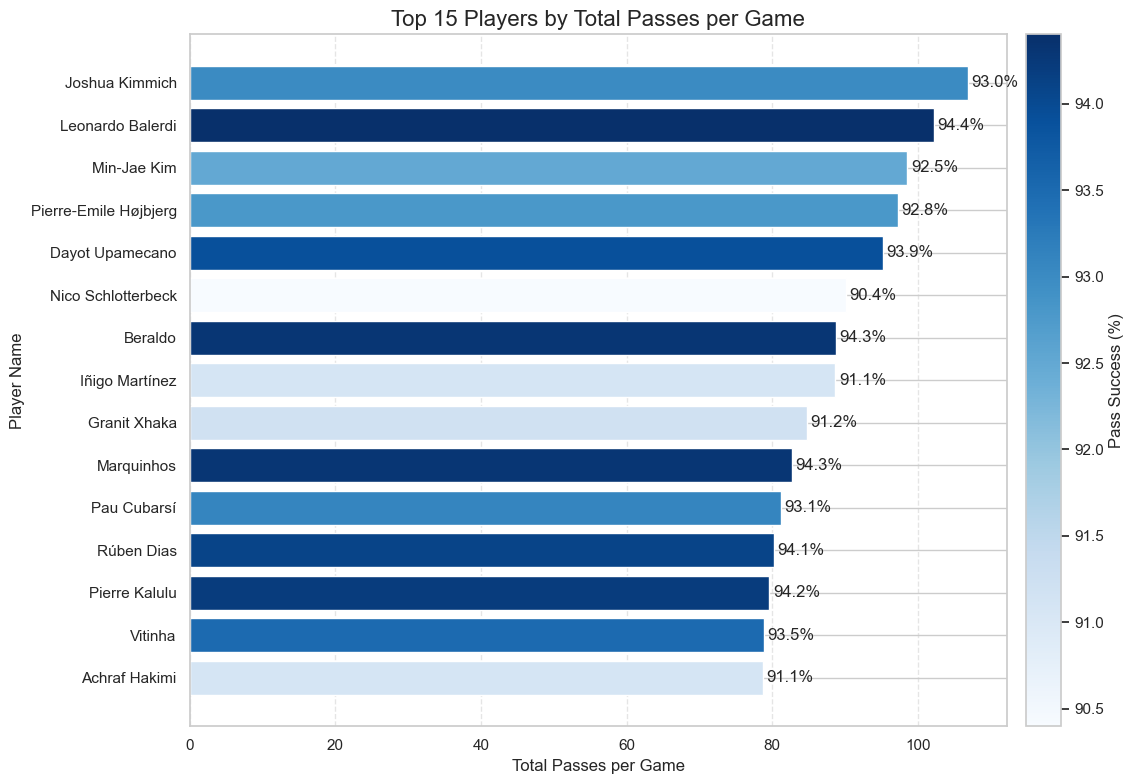

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

plt.close('all')  # closes any existing figures
# Ensure passSuccess is numeric
df_clean['passSuccess'] = pd.to_numeric(df_clean['passSuccess'], errors='coerce')

# Top 15 players by total passes
top_passers = df_clean.sort_values('totalPassesPerGame', ascending=False).head(15)

# Normalize pass success for color mapping
norm = mpl.colors.Normalize(vmin=top_passers['passSuccess'].min(), vmax=top_passers['passSuccess'].max())
cmap = mpl.cm.Blues
colors = [cmap(norm(x)) for x in top_passers['passSuccess']]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12,8))

# Horizontal bar plot
bars = ax.barh(top_passers['Player Name'], top_passers['totalPassesPerGame'], color=colors)

# Invert y-axis to have highest passes on top
ax.invert_yaxis()

# Add pass success % as labels
for bar, ps in zip(bars, top_passers['passSuccess']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{ps:.1f}%", va='center')

# Add a colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy array
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Pass Success (%)')

# Titles and grid
ax.set_title('Top 15 Players by Total Passes per Game', fontsize=16)
ax.set_xlabel('Total Passes per Game')
ax.set_ylabel('Player Name')
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

This visualization highlights players who make the most passes per game and shows their passing accuracy. 
The top 15 passers average over 70 passes per game compared to the dataset mean of 30, underscoring their centrality in possession. The color gradient shows that many of these high-volume passers also maintain >85% accuracy, combining both efficiency and workload.

### Actual Goals vs Expected Goals (Scatter Plot)

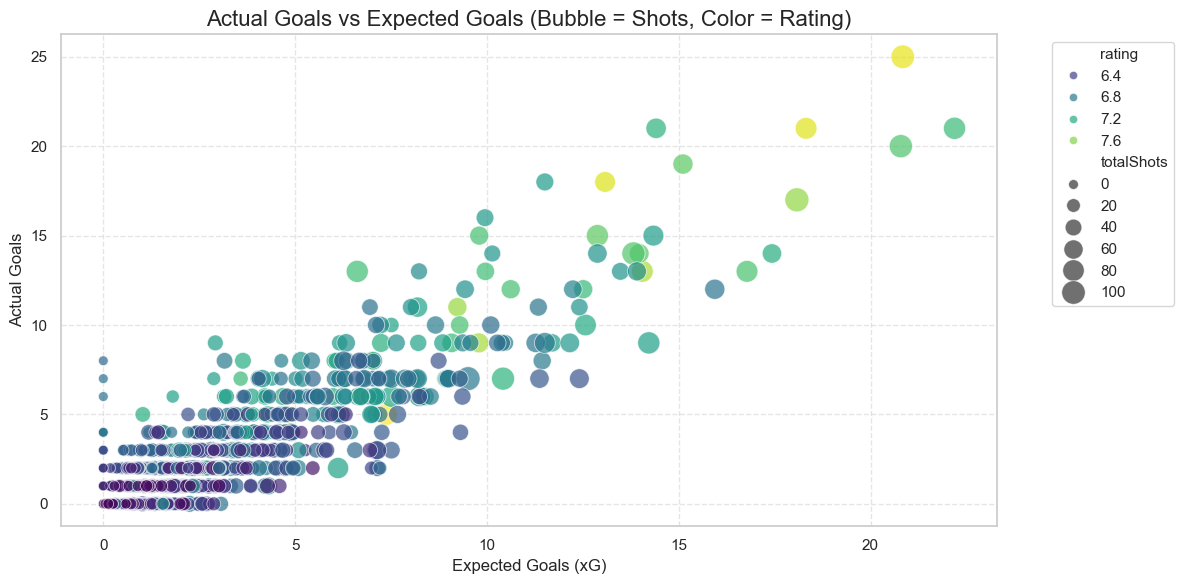

In [106]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_clean,
    x='xG',
    y='goal',
    size='totalShots',       # bubble = number of shots
    hue='rating',            # color = overall rating
    palette='viridis',
    alpha=0.7,
    sizes=(50,300)
)
plt.title('Actual Goals vs Expected Goals (Bubble = Shots, Color = Rating)', fontsize=16)
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.tight_layout()
plt.show()

The scatterplot reveals a strong linear relationship between expected goals and actual goals. Most players cluster near the x=y line, but notable outliers appear: some outperform their xG by 50% or more, while others underperform despite high shot volume.

## SUMMARY

The dataset of 1,529 players shows most numeric features are right-skewed, with means higher than medians due to a few high-performing outliers. Age and height are fairly normally distributed, while goals, assists, xG, and offensive metrics have long tails. Defensive stats vary by position, and passing metrics show positive correlation between volume and accuracy. Overall, variability is high in performance metrics, indicating that averages alone do not fully capture player contributions.